# Importing necessary libraries

### Importing the libraries needed for building the model.
  - numpy to do some numerical operations
  - pandas for cleaning and other processings needed by the data
  - matplotlib for visualizing if there's a need to
  - re[regular expressions for doing some cleaning on the text data itself:
    - to remove some prefix and suffixes
    - to remove emoji like comments
    - to remove @ keyword etc
  - bs4 to scrape the the website for the slangs used by Nigerians
  - requests needed for the url of websites needed for scraping

In [72]:
from collections import Counter
from itertools import combinations
import requests
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import nltk.corpus
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scraping process

In [73]:
url = "https://insight.ng/spice/nigerian-slangs-dictionary/"
req = requests.get(url)
soup = bs(req.text, "html.parser")
slangs = soup.find("ul", attrs = {"class": "ez-toc-list-level-3"} )

# Creating a list for slang from the first website.

In [74]:
slang_list = []
for slang in slangs.select('a'):
  slang_list.append(slang.text)
# print(slang_list)
len(slang_list)

56

In [75]:
new_slang_list = []
for word in slang_list:
  word = word.split('/')
  new_slang_list.extend(word)

In [76]:
cleaned_slang_list_1 = []
for word in new_slang_list:
  word = word.replace('\xa0', '')
  word =  word.replace('.','')
  word = word.replace(':','')
  word = re.sub("\d+", '',word)
  word = word.strip()
  cleaned_slang_list_1.append(word)

# Cleaning the texts gotten from the website for easier processing.

In [77]:
unknown = ['About Author','Latest entries','+']
for word in cleaned_slang_list_1:
  if word in unknown:
    cleaned_slang_list_1.remove(word)

### 58 Texts gotten from the first website after scraping.

In [78]:
len(cleaned_slang_list_1)

58

# Scraping process for the second website

In [79]:
slangs_2_list = []

url_2 = "https://www.skabash.com/popular-nigerian-slangs-and-their-meanings/"
req_2 = requests.get(url_2)
soup_2 = bs(req_2.text, "html.parser")
slangs_2 = soup_2.find("div", attrs={"class":"lwptoc_items lwptoc_items-visible"})

for element in slangs_2.find("div").select("div"):
  slangs_2_list.append(element.find('a').text)

In [80]:
new_slang_list_2 = []

for slang in slangs_2_list:
  slang = slang.replace('\n', '')
  slang = re.sub('\d','',slang)
  slang = slang.replace('.', '')
  new_slang_list_2.append(slang)

In [81]:
new_slang_list_2.remove("Popular Nigerian slangs that are trending")

In [82]:
new_slang_list_2 = list(set(new_slang_list_2))

cleaned_slang_list_2 = []
for word in new_slang_list_2:
  word = word.split('/')
  cleaned_slang_list_2.extend(word)

### 33 slangs gotten from the second website

In [83]:
len(cleaned_slang_list_2)

33

### Combining the two slang lists into a single list by mere list addition

In [84]:
long_list = cleaned_slang_list_1 + cleaned_slang_list_2
len(long_list)

91

In [85]:
short_list = ["really very good", "very great and nice", "pretty nice",
              "God bless", "pretty nice", "better things", "Lord is good", "Bright and beautiful", "going well",
             "soft life", "good news", "greater things"]

# SCRAPING THE **TWITTER** WEB IN SEARCH OF THE TWEETS THAT CONTAINS THE ABOVE WORDS USING __SNSCRAPE__ LIBRARY

In [86]:
!pip install snscrape

In [87]:
import snscrape.modules.twitter as snstwitter

# THE SCRAPING PROCESS

  - The list was gotten by specifying the country's location via the coordinates as shown with the variable loc.

In [88]:
# loc = '9.077751, 8.6774567, 100km'
# tweet_list = []
# for word in long_list:
#   for i, item in enumerate(snstwitter.TwitterSearchScraper('{} geocode:"{}"'.format(word, loc)).get_items()):
#     if i > 150:
#       break
#     tweet_list.append([item.content, item.likeCount, item.user.location])
# df = pd.DataFrame(tweet_list, columns = ["tweets", "likes", "location"])
# df.to_csv("slang_tweets_1.csv")

In [89]:
# loc = '9.077751, 8.6774567, 100km'
# tweet_list = []
# for word in short_list:
#   for i, item in enumerate(snstwitter.TwitterSearchScraper('{} geocode:"{}"'.format(word, loc)).get_items()):
#     if i > 150:
#       break
#     tweet_list.append([item.content, item.likeCount, item.user.location])
# df_short = pd.DataFrame(tweet_list, columns = ["tweets", "likes", "location"])
# df_short.to_csv("slang_tweets_2.csv")

In [90]:
df = pd.read_csv("slang_tweets_1.csv")
df_short = pd.read_csv("slang_tweets_2.csv")
df_short.head(20)

,Unnamed: 0,tweets,likes,location
0,0,@AITraderGlobal Very brilliant &amp; interesti...,0,Abuja
1,1,Men really love the mean girls. And I’m super ...,0,"Abuja, Nigeria"
2,2,@khadijaarrh U really did a very good job dear,0,"Jos, Nigeria"
3,3,@AITraderGlobal Very brilliant &amp; interesti...,3,"Abuja,Nigeria"
4,4,@NastyBlaq Thank you very much @NastyBlaq eve...,0,"Abuja, Nigeria"
5,5,"@brownelixir It’s so good. Bar Insecure, I can...",0,NaN
6,6,@silasadedoyin @Abiodun0x 1. It’s very possibl...,0,"Abuja, Nigeria"
7,7,even after such a traumatic near death experie...,0,"Abuja, Nigeria"
8,8,@JefferyAnkamah @phil_Adesh @AkosuaAmpofowah G...,2,Federal Capital Territory
9,9,@con2etal 😂 the man dey give me joy shaa..I re...,1,"Abuja, Nigeria"


In [91]:
df_short['class'] = 'non bullying'
df['class'] = 'bullying'

df_short['label'] = 0
df['label'] = 1

In [92]:
df_total = pd.concat([df, df_short], axis=0, ignore_index=True)

In [93]:
df_total

,Unnamed: 0,tweets,likes,location,class,label
0,0,Kue kueee sapa mau kueeee 🍪\nberbukalah dgn jo...,0,Jeje,bullying,1
1,1,How yesterday ended 🥰🥰\n\nHaving daily sales k...,1,"Abuja, Nigeria",bullying,1
2,2,@JayneCint This garri get sapa inside ooo😂😂😂 m...,0,Abuja Nigeria,bullying,1
3,3,@dammiedammie35 Na sapa cause this one for the...,1,Lagos/Abuja,bullying,1
4,4,@yabaleftonline AMP: My God I plead (I beg you...,0,Abuja,bullying,1
...,...,...,...,...,...,...
12500,1260,@RealDreylo Davido on your WhatsApp contact ca...,0,NaN,non bullying,0
12501,1261,"@TundeTASH Happy anniversary amazing souls, ma...",1,"Abuja, Nigeria",non bullying,0
12502,1262,Trust that greater things are aligning for you!!!,281,Canada,non bullying,0
12503,1263,"Innoson got this far without the government, h...",1,"Abuja, Nigeria",non bullying,0


### Making a copy of the dataset

In [94]:
df_1 = df_total.copy()

# **CLEANING THE TEXT DATA**
### The Text data needs to be cleaned before being fed into the model for training and testing.
    - Normalizing 
    - Remove Unicode Characters
    - Remove Stopwords
    - Perform Stemming
    - Lemmatization

**Normalizing the texts..**
  - changing all to lowercases also known as _case normalization_
    - creating a function to used for changing the case to a lowercase.

In [95]:
def lowercase(text):
  text = text.lower()
  return text

**Removing Unicode Characters**
  - Creating a function to remove unicode characters
    - This function uses regular expression library

In [96]:
def unicode_removal(text):
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  return text

# **STOP WORDS**
#### Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc. 

**Removing Stopwords**
  - Creating a function to remove the stop words
    - This function uses the Natural Language ToolKit library 

In [97]:
# downloading the stopwords needed
nltk.download('stopwords')

def stopwords_removal(text):
  stop = stopwords.words('english')
  text = " ".join([word for word in text.split() if word not in (stop)])
  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oyeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming

#### Stemming nvolves grouping of words by their root stem. This makes it clear or helps recognize that ‘jumping’ ‘jumps’ and ‘jumped’ are all rooted to the same verb (jump) and thus are referring to similar problems.
  - Creating a function to stem the texts.

In [98]:
def stemming(text):
  stemmer = PorterStemmer()
  text = " ".join([stemmer.stem(word) for word in text.split()])
  return text

# Lemmatization

#### Lemmatization groups words based on root definition, and helps to differentiate between present, past, and indefinite.

#### In order words, ‘jumps’ and ‘jump’ are grouped into the present ‘jump’, as different from all uses of ‘jumped’ which are grouped together as past tense, and all instances of ‘jumping’ which are grouped together as the indefinite (meaning continuing/continuous).

In [99]:
nltk.download('wordnet')
def lemmatize(text):
  lemmatizer = WordNetLemmatizer()
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
  return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oyeni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Selecting the useful feature we need to train the model.

In [100]:
x = df_1['tweets']
y = df_1['label']

### Passing the text one by one through each of the functions created above using the lambda function method.

In [101]:
x = x.apply(lambda x: lowercase(x))
x = x.apply(lambda x: unicode_removal(x))
x = x.apply(lambda x: stopwords_removal(x))
x = x.apply(lambda x: stemming(x))
x = x.apply(lambda x: lemmatize(x))

### Splitting the dataset into training and testing sets using the train test split...

In [102]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=40)

### Using Count vectorizer to vectorize the preprocessed texts

In [103]:
vectorizer =  CountVectorizer()
x_train_vect = vectorizer.fit_transform(x_train)

### Gaussian Naive Bayes 

In [104]:
model_gnb = GaussianNB()

# fitting 
model_gnb.fit(x_train_vect.toarray(),y_train)

GaussianNB()

### Testing the model

In [105]:
# Gaussian Naive Bayes
x_test_vect_gnb = vectorizer.transform(x_test)

In [106]:
y_pred_gnb = model_gnb.predict(x_test_vect_gnb.toarray())

## Checking the accuracy score
###    - f1 score
###    - precision
###    - recall
###    - and the _confusion matrix_

In [107]:
print(" Gaussian Naive Bayes accuracy score:", accuracy_score(y_test, y_pred_gnb))

 Gaussian Naive Bayes accuracy score: 0.8382196162046909


In [108]:
print('classification reports:\n',classification_report(y_test,model_gnb.predict(x_test_vect_gnb.toarray())))

classification reports:
               precision    recall  f1-score   support

           0       0.31      0.46      0.37       385
           1       0.93      0.88      0.91      3367

    accuracy                           0.84      3752
   macro avg       0.62      0.67      0.64      3752
weighted avg       0.87      0.84      0.85      3752



##### The GNB model has 84% accuracy

     The average prcision value is 93%

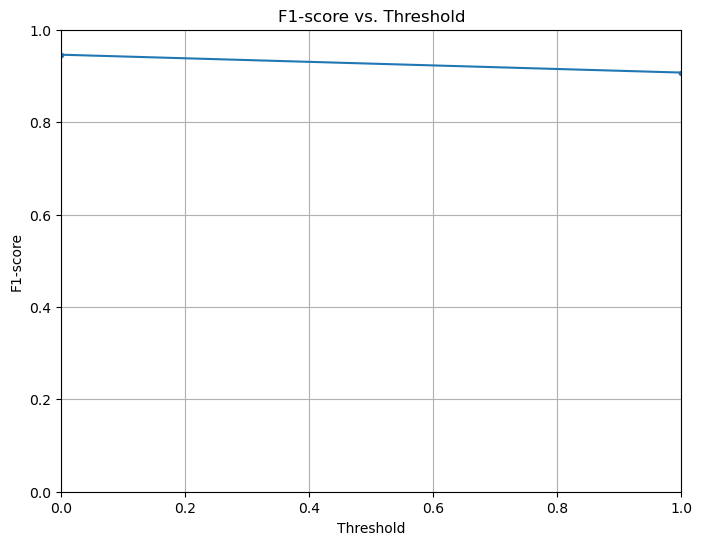

<Figure size 640x480 with 0 Axes>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Replace these with your actual predicted probabilities and true labels
# predicted_probs should be a 1D array of predicted probabilities for the positive class
# true_labels should be a 1D array of true labels (0 for negative class, 1 for positive class)
predicted_probs = np.array([0.1, 0.3, 0.4, 0.6, 0.8, 0.2, 0.7, 0.9, 0.5, 0.3])
true_labels = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

# Calculate precision-recall pairs and F1-scores
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_gnb)
f1_scores = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)

precision_gnb, recall_gnb, thresholds_gnb = precision_gnb_recall_gnb_curve(y_test, y_pred_gnb)
f1_scores = 2 * (precision_gnb * recall_gnb) / (precision_gnb + recall_gnb)

# Plot the F1-score graph
plt.figure(figsize=(8, 6))
plt.plot(thresholds_gnb, f1_scores[:-1], marker='.')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
plt.savefig('f1_score_graph.jpg')


### Saving the vectorizer as a pickle file

In [111]:
import pickle

# Saving our vectorizer
with open("vectorizer.pkl", "wb") as vect:
    pickle.dump(vectorizer, vect)

##### Saving the GNB model as a pickle file

In [112]:
# saving the gnb model
with open('tweet_gnb.pkl','wb') as myfile_gnb:
    pickle.dump(model_gnb,myfile_gnb)

with open('tweet_gnb.pkl','rb') as myfile_gnb:
    model = pickle.load(myfile_gnb)


### Logistic Regression Model

In [113]:
# Logistic regression
model_lr =  LogisticRegression()

# fitting
model_lr.fit(x_train_vect.toarray(),y_train)

LogisticRegression()

In [114]:
# Logistic regression 
x_test_vect_lr = vectorizer.transform(x_test)

In [115]:
y_pred_lr = model_lr.predict(x_test_vect_lr.toarray())

In [116]:
print("Logistic Regression accuracy score:", accuracy_score(y_test, y_pred_lr))

Logistic Regression accuracy score: 0.9712153518123667


In [117]:
print('classification reports:\n',classification_report(y_test,model_lr.predict(x_test_vect_lr.toarray())))

classification reports:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       385
           1       0.98      0.99      0.98      3367

    accuracy                           0.97      3752
   macro avg       0.95      0.89      0.92      3752
weighted avg       0.97      0.97      0.97      3752



    The comparison between the precision recall curve

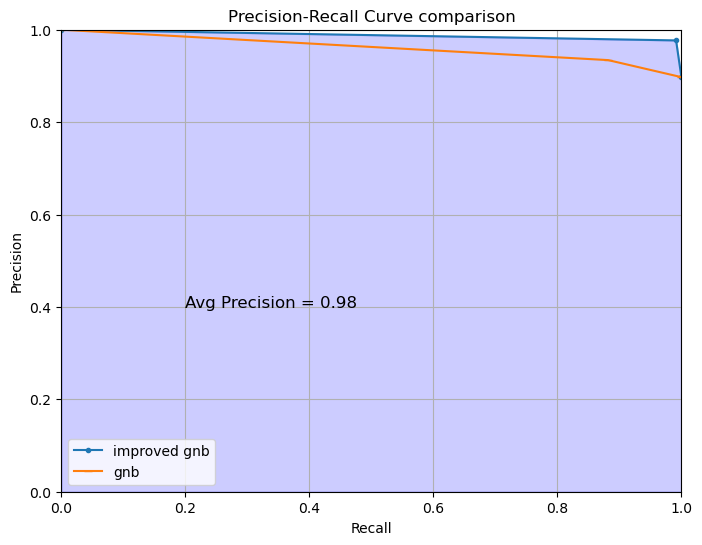

<Figure size 640x480 with 0 Axes>

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Replace these with your actual predicted probabilities and true labels
# predicted_probs should be a 1D array of predicted probabilities for the positive class
# true_labels should be a 1D array of true labels (0 for negative class, 1 for positive class)
# Calculate precision-recall pairs and average precision score
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
avg_precision_lr = average_precision_score(y_test, y_pred_lr)

precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y_test, y_pred_gnb)
avg_precision_gnb = average_precision_score(y_test, y_pred_gnb)

# Plot the precision-recall graph
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, marker='.', label='improved gnb')
plt.plot(recall_gnb, precision_gnb, marker='_', label='gnb')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve comparison')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.text(0.2, 0.4, f'Avg Precision = {avg_precision:.2f}', fontsize=12)
plt.legend()
plt.show()
plt.savefig('precision_recall_graph.jpg')

    The average precision score is 98%

     The comparison between the f1_score curve

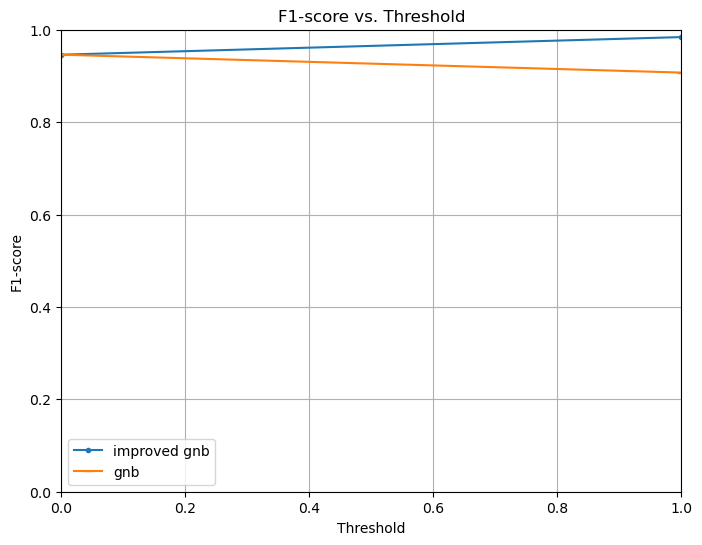

<Figure size 640x480 with 0 Axes>

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Replace these with your actual predicted probabilities and true labels
# predicted_probs should be a 1D array of predicted probabilities for the positive class
# true_labels should be a 1D array of true labels (0 for negative class, 1 for positive class)
predicted_probs = np.array([0.1, 0.3, 0.4, 0.6, 0.8, 0.2, 0.7, 0.9, 0.5, 0.3])
true_labels = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

# Calculate precision-recall pairs and F1-scores
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
f1_scores_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)

precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(y_test, y_pred_gnb)
f1_scores_gnb = 2 * (precision_gnb * recall_gnb) / (precision_gnb + recall_gnb)

# Plot the F1-score graph
plt.figure(figsize=(8, 6))
plt.plot(thresholds_lr, f1_scores_lr[:-1], marker='.', label = 'improved gnb')
plt.plot(thresholds_gnb, f1_scores_gnb[:-1], marker='_', label = 'gnb')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()
plt.savefig('f1_score_graph.jpg')


##### The lOGISTIC Regression model has 97% accuracy

##### Saving the Logistic Regression model as a pickle file

In [120]:
# saving the logistic regression model
with open('tweet_lr.pkl','wb') as myfile_lr:
    pickle.dump(model_lr,myfile_lr)

with open('tweet_lr.pkl','rb') as myfile_lr:
    model = pickle.load(myfile_lr)

#### Visualizing the accuracy score to show the improvement 

In [121]:
acc_dict = {
        "Logistic Regression":accuracy_score(y_test, y_pred_lr)*100,
        "naive_bayes":accuracy_score(y_test, y_pred_gnb)*100,
        }

<AxesSubplot:>

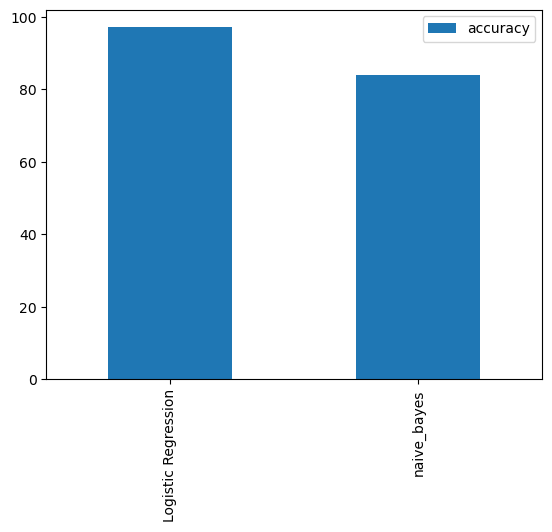

In [122]:
pd.DataFrame(acc_dict.values(), index=acc_dict.keys(), columns=["accuracy"]).plot(kind='bar')

### **Improving the model further**

### Using XG BOOSTING
##### XG BOOST stands for Xtreme Gradient Boosting

To understand what XGBoost is all about let's see what Gradient Boost is:

###  **Gradient Boosting**

##### Gradient boosting is a supervised machine learning algorithm, which tries to predict a target variable by combining the estimates of a set of simpler, weaker models. In boosting, the trees are built in a sequential manner such that each subsequent tree aims to reduce the errors of the previous tree. The misclassified labels are given higher weights. Each tree learns from its predecessors and tries to reduce the residual errors. So, the tree next in sequence will learn from the previous tree residuals.

### **XG Boost**

#####  XGBoost (Extreme Gradient Boosting) is an advanced implementation of the **gradient boosting** algorithm. It has proved to be a highly effective machine learning algorithm extensively used in machine learning competitions. XGBoost has high predictive power and is almost 10 times faster than other gradient boosting techniques. It also includes a variety of regularization parameters which reduces overfitting and improves overall performance. Hence, it is also known as regularized boosting technique.

In [123]:
!pip install xgboost

In [124]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(x_train_vect.toarray(),y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [125]:
y_pred_xgb = xgb_clf.predict(x_test_vect_gnb)

In [126]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))

XGBoost model accuracy score: 0.9736


In [127]:
acc_dict = {
        "naive_bayes":accuracy_score(y_test, y_pred_gnb)*100,
         "XG Boost":accuracy_score(y_test, y_pred_xgb)*100,
        }

<AxesSubplot:>

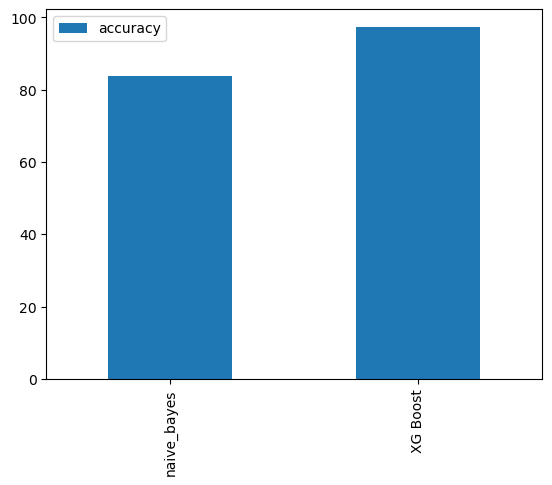

In [128]:
pd.DataFrame(acc_dict.values(), index=acc_dict.keys(), columns=["accuracy"]).plot(kind='bar')

##### based on the accuracy... it has increased by approximately 13%.

## Improving the initial Gaussian Naive Bayes Model by tunning the **hyperparameters**

### Using GridSearchCV to find the best estimator 

In [129]:
# from sklearn.model_selection import GridSearchCV
# param_gnb = {'var_smoothing' : np.logspace(0, -9, num=100)}

# gnb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_gnb, verbose=1, cv=10, n_jobs=-1)

# gnb_grid.fit(x_train_vect.toarray(),y_train)

In [130]:
# gnb_grid.best_estimator_

In [131]:
# test_pred = gnb_grid.predict(x_test_vect_gnb.toarray())

In [132]:
# print(" Improved Gaussian Naive Bayes accuracy score:", accuracy_score(y_test, test_pred))
# print('classification reports:\n',classification_report(y_test,gnb_grid.predict(x_test_vect_gnb.toarray())))

### Comparison between the Gaussian Naive Bayes and the improved Gaussian Naive Bayes
### Using visuals

In [133]:
# acc_dict = {
#         "naive_bayes":accuracy_score(y_test, y_pred_gnb)*100,
#          "Imrpoved Gaussian Naive Bayes":accuracy_score(y_test, test_pred)*100,
#         }

# pd.DataFrame(acc_dict.values(), index=acc_dict.keys(), columns=["accuracy"]).plot(kind='bar')